# Walmart Indeed Employee review Analysis

For this project I am scraping employee reviews from indeed for the company Walmart. For this analysis I chose Walmart since they are widley known as one of the biggest employers in the United States. My main goal was to get deeper into the trends of employee reviews to give prospective employees more insight into their decision to work for Walmart. Indeed has some decent insight functions - like overall reviews, keywords earch, review by location - But I want to see how the company is trending in ratings, and also trending in overal sentiment. To me, if the sentiment of reviews are improving, the work experience should be improving. In theory of course.

I am going to be looking at:
> Average rating per year since 2017

>Comparing ratings, and counts of ratings

> Average sentiment scores - For reviews and the titles of the reviews

> Scatter Matrix - showing relationships and distributions in data

> Average rating per year for both Current and Former employees

> Average sentiment for Titles and Reviews for both Current and Former Employees

## Importing Data and Libraries (Also a data overview)

The data was scraped using Power Automate. It is a microsoft product, that with a gui, can automate processes on your computer. You can easily build a webscraping flow without writing any code. Although I have written code to webscrape this exact dataset before, I wanted to try out the tool. It turns out to be much less of a headache, and was really smooth to use overall. One problem that I had was I didnt build any exception handling with the tool. I think it is possible but I didnt get that far into it. I simply tried running it a few times and used the excel file that collected the most data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install -U textblob
from textblob import TextBlob
plt.style.use('ggplot')

In [2]:
wm = pd.read_excel('WalmartData.xlsx', index_col = None, header = None)

In [3]:
wm.head()

,0,1,2,3
0,NaN,NaN,NaN,NaN
1,great place to work,Indeed Featured reviewThe most useful review s...,4.0,"CUSTOMER SERVICE SUPERVISOR, OVER-NIGHT (Forme..."
2,"Fun, Rewarding",If you like physical work you’ll do well and l...,3.0,"Associate (Former Employee) - Houston, TX - Fe..."
3,5 stars,What is the best part of working at the compan...,5.0,"Office Manager (Former Employee) - Sonora, CA ..."
4,Ignorant Management,"Limited training, and pushed to work solo, whe...",2.0,"Cashier (Former Employee) - Honesdale, PA - Fe..."


In [4]:
wm.shape

(139210, 4)

In [5]:
wm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139210 entries, 0 to 139209
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       139030 non-null  object 
 1   1       139209 non-null  object 
 2   2       139209 non-null  float64
 3   3       139209 non-null  object 
dtypes: float64(1), object(3)
memory usage: 4.2+ MB


1. Rename Columns
2. Remove the null header row
3. Parse the last column for Location, Position, Date, and Employment status

## Data Cleaning

In [6]:
#relabaling columns

labels = ['title', 'review', 'rating', 'review_data']
wm.columns = labels
wm

,title,review,rating,review_data
0,NaN,NaN,NaN,NaN
1,great place to work,Indeed Featured reviewThe most useful review s...,4.0,"CUSTOMER SERVICE SUPERVISOR, OVER-NIGHT (Forme..."
2,"Fun, Rewarding",If you like physical work you’ll do well and l...,3.0,"Associate (Former Employee) - Houston, TX - Fe..."
3,5 stars,What is the best part of working at the compan...,5.0,"Office Manager (Former Employee) - Sonora, CA ..."
4,Ignorant Management,"Limited training, and pushed to work solo, whe...",2.0,"Cashier (Former Employee) - Honesdale, PA - Fe..."
...,...,...,...,...
139205,Great place,"I loved working for Walmart, brought me out of...",5.0,"Cashier/Stocker (Former Employee) - Webb City,..."
139206,hostile work environment,No job security. There is a lot of backstabbin...,1.0,Order Specialist (Former Employee) - Bentonvil...
139207,team players,i enjoyed the team player relationship we had ...,5.0,"Cashier (Former Employee) - Anaheim, CA - July..."
139208,Decent pay for job,For the most part they promote furthering your...,4.0,"Meat Clerk (Current Employee) - Iowa - July 7,..."


In [7]:
#dropping the duplicate index column

wm = wm.drop(index = 0).reset_index()

In [8]:
wm

,index,title,review,rating,review_data
0,1,great place to work,Indeed Featured reviewThe most useful review s...,4.0,"CUSTOMER SERVICE SUPERVISOR, OVER-NIGHT (Forme..."
1,2,"Fun, Rewarding",If you like physical work you’ll do well and l...,3.0,"Associate (Former Employee) - Houston, TX - Fe..."
2,3,5 stars,What is the best part of working at the compan...,5.0,"Office Manager (Former Employee) - Sonora, CA ..."
3,4,Ignorant Management,"Limited training, and pushed to work solo, whe...",2.0,"Cashier (Former Employee) - Honesdale, PA - Fe..."
4,5,4 stars,What is the best part of working at the compan...,4.0,"Walmart Stocker (Former Employee) - Pontotoc, ..."
...,...,...,...,...,...
139204,139205,Great place,"I loved working for Walmart, brought me out of...",5.0,"Cashier/Stocker (Former Employee) - Webb City,..."
139205,139206,hostile work environment,No job security. There is a lot of backstabbin...,1.0,Order Specialist (Former Employee) - Bentonvil...
139206,139207,team players,i enjoyed the team player relationship we had ...,5.0,"Cashier (Former Employee) - Anaheim, CA - July..."
139207,139208,Decent pay for job,For the most part they promote furthering your...,4.0,"Meat Clerk (Current Employee) - Iowa - July 7,..."


In [9]:
print(wm['review_data'][0])

CUSTOMER SERVICE SUPERVISOR, OVER-NIGHT (Former Employee) - El Paso, TX 79904 - March 23, 2018


Even though this looks like an easy and consistent format, after browsing the data in excel its not 100% consistent. But most of the data follows this format. 

In [10]:
#saving the original dataset so I can work on cleaning a new one

wm_wrang = wm
wm_wrang

,index,title,review,rating,review_data
0,1,great place to work,Indeed Featured reviewThe most useful review s...,4.0,"CUSTOMER SERVICE SUPERVISOR, OVER-NIGHT (Forme..."
1,2,"Fun, Rewarding",If you like physical work you’ll do well and l...,3.0,"Associate (Former Employee) - Houston, TX - Fe..."
2,3,5 stars,What is the best part of working at the compan...,5.0,"Office Manager (Former Employee) - Sonora, CA ..."
3,4,Ignorant Management,"Limited training, and pushed to work solo, whe...",2.0,"Cashier (Former Employee) - Honesdale, PA - Fe..."
4,5,4 stars,What is the best part of working at the compan...,4.0,"Walmart Stocker (Former Employee) - Pontotoc, ..."
...,...,...,...,...,...
139204,139205,Great place,"I loved working for Walmart, brought me out of...",5.0,"Cashier/Stocker (Former Employee) - Webb City,..."
139205,139206,hostile work environment,No job security. There is a lot of backstabbin...,1.0,Order Specialist (Former Employee) - Bentonvil...
139206,139207,team players,i enjoyed the team player relationship we had ...,5.0,"Cashier (Former Employee) - Anaheim, CA - July..."
139207,139208,Decent pay for job,For the most part they promote furthering your...,4.0,"Meat Clerk (Current Employee) - Iowa - July 7,..."


In [11]:
#extracting the position from review_data

def extract_position(text):
    if "(Former Employee)" in text:
        return text[:text.find("(Former Employee)")]
    elif "(Current Employee)" in text:
        return text[:text.find("(Current Employee)")]
    else:
        return "Position not found"

In [12]:
wm_wrang['position'] = wm_wrang['review_data'].apply(extract_position)

In [13]:
wm_wrang['position']

0         CUSTOMER SERVICE SUPERVISOR, OVER-NIGHT 
1                                       Associate 
2                                  Office Manager 
3                                         Cashier 
4                                 Walmart Stocker 
                            ...                   
139204                            Cashier/Stocker 
139205                           Order Specialist 
139206                                    Cashier 
139207                                 Meat Clerk 
139208                   3rd shift Cashier/ Stock 
Name: position, Length: 139209, dtype: object

In [14]:
# extracting employment status from review_data

def extract_employment_status(text):
    if "(Former Employee)" in text:
        return "Former Employee"
    elif "(Current Employee)" in text:
        return "Current Employee"
    else:
        return "Employment status not found"

In [15]:
wm_wrang['employment_status'] = wm['review_data'].apply(extract_employment_status)

In [16]:
wm_wrang

,index,title,review,rating,review_data,position,employment_status
0,1,great place to work,Indeed Featured reviewThe most useful review s...,4.0,"CUSTOMER SERVICE SUPERVISOR, OVER-NIGHT (Forme...","CUSTOMER SERVICE SUPERVISOR, OVER-NIGHT",Former Employee
1,2,"Fun, Rewarding",If you like physical work you’ll do well and l...,3.0,"Associate (Former Employee) - Houston, TX - Fe...",Associate,Former Employee
2,3,5 stars,What is the best part of working at the compan...,5.0,"Office Manager (Former Employee) - Sonora, CA ...",Office Manager,Former Employee
3,4,Ignorant Management,"Limited training, and pushed to work solo, whe...",2.0,"Cashier (Former Employee) - Honesdale, PA - Fe...",Cashier,Former Employee
4,5,4 stars,What is the best part of working at the compan...,4.0,"Walmart Stocker (Former Employee) - Pontotoc, ...",Walmart Stocker,Former Employee
...,...,...,...,...,...,...,...
139204,139205,Great place,"I loved working for Walmart, brought me out of...",5.0,"Cashier/Stocker (Former Employee) - Webb City,...",Cashier/Stocker,Former Employee
139205,139206,hostile work environment,No job security. There is a lot of backstabbin...,1.0,Order Specialist (Former Employee) - Bentonvil...,Order Specialist,Former Employee
139206,139207,team players,i enjoyed the team player relationship we had ...,5.0,"Cashier (Former Employee) - Anaheim, CA - July...",Cashier,Former Employee
139207,139208,Decent pay for job,For the most part they promote furthering your...,4.0,"Meat Clerk (Current Employee) - Iowa - July 7,...",Meat Clerk,Current Employee


In [17]:
#extracting location data using regex patterns

wm_wrang['location'] = wm_wrang['review_data'].str.extract(r".*- (.*) -.*")

In [18]:
wm_wrang

,index,title,review,rating,review_data,position,employment_status,location
0,1,great place to work,Indeed Featured reviewThe most useful review s...,4.0,"CUSTOMER SERVICE SUPERVISOR, OVER-NIGHT (Forme...","CUSTOMER SERVICE SUPERVISOR, OVER-NIGHT",Former Employee,"El Paso, TX 79904"
1,2,"Fun, Rewarding",If you like physical work you’ll do well and l...,3.0,"Associate (Former Employee) - Houston, TX - Fe...",Associate,Former Employee,"Houston, TX"
2,3,5 stars,What is the best part of working at the compan...,5.0,"Office Manager (Former Employee) - Sonora, CA ...",Office Manager,Former Employee,"Sonora, CA"
3,4,Ignorant Management,"Limited training, and pushed to work solo, whe...",2.0,"Cashier (Former Employee) - Honesdale, PA - Fe...",Cashier,Former Employee,"Honesdale, PA"
4,5,4 stars,What is the best part of working at the compan...,4.0,"Walmart Stocker (Former Employee) - Pontotoc, ...",Walmart Stocker,Former Employee,"Pontotoc, MS"
...,...,...,...,...,...,...,...,...
139204,139205,Great place,"I loved working for Walmart, brought me out of...",5.0,"Cashier/Stocker (Former Employee) - Webb City,...",Cashier/Stocker,Former Employee,"Webb City, MO"
139205,139206,hostile work environment,No job security. There is a lot of backstabbin...,1.0,Order Specialist (Former Employee) - Bentonvil...,Order Specialist,Former Employee,"Bentonville, AR"
139206,139207,team players,i enjoyed the team player relationship we had ...,5.0,"Cashier (Former Employee) - Anaheim, CA - July...",Cashier,Former Employee,"Anaheim, CA"
139207,139208,Decent pay for job,For the most part they promote furthering your...,4.0,"Meat Clerk (Current Employee) - Iowa - July 7,...",Meat Clerk,Current Employee,Iowa


In [19]:
#finally extracting date

def extract_date(text):
    date = text.split(' - ')[-1]
    return date

In [20]:
wm_wrang['date']= wm_wrang['review_data'].apply(extract_date)

In [21]:
wm_wrang.head()

,index,title,review,rating,review_data,position,employment_status,location,date
0,1,great place to work,Indeed Featured reviewThe most useful review s...,4.0,"CUSTOMER SERVICE SUPERVISOR, OVER-NIGHT (Forme...","CUSTOMER SERVICE SUPERVISOR, OVER-NIGHT",Former Employee,"El Paso, TX 79904","March 23, 2018"
1,2,"Fun, Rewarding",If you like physical work you’ll do well and l...,3.0,"Associate (Former Employee) - Houston, TX - Fe...",Associate,Former Employee,"Houston, TX","February 4, 2023"
2,3,5 stars,What is the best part of working at the compan...,5.0,"Office Manager (Former Employee) - Sonora, CA ...",Office Manager,Former Employee,"Sonora, CA","February 3, 2023"
3,4,Ignorant Management,"Limited training, and pushed to work solo, whe...",2.0,"Cashier (Former Employee) - Honesdale, PA - Fe...",Cashier,Former Employee,"Honesdale, PA","February 3, 2023"
4,5,4 stars,What is the best part of working at the compan...,4.0,"Walmart Stocker (Former Employee) - Pontotoc, ...",Walmart Stocker,Former Employee,"Pontotoc, MS","February 3, 2023"


We were able to extract a lot of data out of the review data column and seperate it into its own columns which is nice. Obviously the date wasnt extracted as a datetime object, so I went ahead and completed that as well:

In [22]:
# changing date to dt

wm_wrang['date'] = pd.to_datetime(wm_wrang['date'], format = ('%B %d, %Y'))

In [23]:
wm_wrang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139209 entries, 0 to 139208
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   index              139209 non-null  int64         
 1   title              139030 non-null  object        
 2   review             139209 non-null  object        
 3   rating             139209 non-null  float64       
 4   review_data        139209 non-null  object        
 5   position           139209 non-null  object        
 6   employment_status  139209 non-null  object        
 7   location           139208 non-null  object        
 8   date               139209 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 9.6+ MB


Here we see we have lots of reviews with no titles. Upon furthur investigation I found that sometimes the scraper would offset the data by one, so title would be in review, and rating would be in posion and so on - and title would just be empty. I remember having this same problem writing my own webscraper and I never found a solution. I never could figure out a consistent pattern as to why this happens. Since it would be too much of a pain to fix this data, and its not a huge portion of my data - I decided to remove it. 

In [24]:
#removing columns with null title

wm_wrang = wm_wrang[wm_wrang['title'].isnull() != True].copy()

In [25]:
#not going to use these columns -so dropping

wm_wrang.drop(columns = ['index','review_data'], inplace = True)

In [26]:
wm_wrang

,title,review,rating,position,employment_status,location,date
0,great place to work,Indeed Featured reviewThe most useful review s...,4.0,"CUSTOMER SERVICE SUPERVISOR, OVER-NIGHT",Former Employee,"El Paso, TX 79904",2018-03-23
1,"Fun, Rewarding",If you like physical work you’ll do well and l...,3.0,Associate,Former Employee,"Houston, TX",2023-02-04
2,5 stars,What is the best part of working at the compan...,5.0,Office Manager,Former Employee,"Sonora, CA",2023-02-03
3,Ignorant Management,"Limited training, and pushed to work solo, whe...",2.0,Cashier,Former Employee,"Honesdale, PA",2023-02-03
4,4 stars,What is the best part of working at the compan...,4.0,Walmart Stocker,Former Employee,"Pontotoc, MS",2023-02-03
...,...,...,...,...,...,...,...
139204,Great place,"I loved working for Walmart, brought me out of...",5.0,Cashier/Stocker,Former Employee,"Webb City, MO",2017-07-07
139205,hostile work environment,No job security. There is a lot of backstabbin...,1.0,Order Specialist,Former Employee,"Bentonville, AR",2017-07-07
139206,team players,i enjoyed the team player relationship we had ...,5.0,Cashier,Former Employee,"Anaheim, CA",2017-07-07
139207,Decent pay for job,For the most part they promote furthering your...,4.0,Meat Clerk,Current Employee,Iowa,2017-07-07


In [27]:
wm = wm_wrang

When im happy with the cleaned base dataset - I reset it to my base level dataset. I dont think this is good practice for future reference but thats what I chose to do here. Ill fix that in the future

In [28]:
wm

,title,review,rating,position,employment_status,location,date
0,great place to work,Indeed Featured reviewThe most useful review s...,4.0,"CUSTOMER SERVICE SUPERVISOR, OVER-NIGHT",Former Employee,"El Paso, TX 79904",2018-03-23
1,"Fun, Rewarding",If you like physical work you’ll do well and l...,3.0,Associate,Former Employee,"Houston, TX",2023-02-04
2,5 stars,What is the best part of working at the compan...,5.0,Office Manager,Former Employee,"Sonora, CA",2023-02-03
3,Ignorant Management,"Limited training, and pushed to work solo, whe...",2.0,Cashier,Former Employee,"Honesdale, PA",2023-02-03
4,4 stars,What is the best part of working at the compan...,4.0,Walmart Stocker,Former Employee,"Pontotoc, MS",2023-02-03
...,...,...,...,...,...,...,...
139204,Great place,"I loved working for Walmart, brought me out of...",5.0,Cashier/Stocker,Former Employee,"Webb City, MO",2017-07-07
139205,hostile work environment,No job security. There is a lot of backstabbin...,1.0,Order Specialist,Former Employee,"Bentonville, AR",2017-07-07
139206,team players,i enjoyed the team player relationship we had ...,5.0,Cashier,Former Employee,"Anaheim, CA",2017-07-07
139207,Decent pay for job,For the most part they promote furthering your...,4.0,Meat Clerk,Current Employee,Iowa,2017-07-07


In [29]:
wm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139030 entries, 0 to 139208
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   title              139030 non-null  object        
 1   review             139030 non-null  object        
 2   rating             139030 non-null  float64       
 3   position           139030 non-null  object        
 4   employment_status  139030 non-null  object        
 5   location           139029 non-null  object        
 6   date               139030 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 8.5+ MB


In [30]:
wm['location'] = wm['location'].fillna('No Location Specified')

Here I notice we are missing a value for location. Im not really concerned with location in this analysis, so I decided to fill with a "No Location Specified"

In [31]:
wm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139030 entries, 0 to 139208
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   title              139030 non-null  object        
 1   review             139030 non-null  object        
 2   rating             139030 non-null  float64       
 3   position           139030 non-null  object        
 4   employment_status  139030 non-null  object        
 5   location           139030 non-null  object        
 6   date               139030 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 8.5+ MB


# Analysis

Lets look back to my main goals for this analysis:

> Average rating per year since 2017

> Comparing ratings, and counts of ratings

> Average sentiment scores - For reviews and titles of reviews

> Scatter Matrix - showing relationships and distributions in data

> Average rating per year for both Current and Former employees

> Average sentiment for Titles and Reviews for both Current and Former Employees

### Average rating per year since 2017

In [32]:
#grouping data by year, and then aggregating the mean for rating. also getting count

wm_year_average = wm.groupby(wm['date'].dt.year).agg({'date': "size", 'rating': "mean"}).rename(columns = {"date":"count"})

In [33]:
wm_year_average

,count,rating
date,,
2017,16724,3.449474
2018,40365,3.552484
2019,33736,3.354932
2020,19103,3.286500
2021,12797,2.804485
2022,14828,2.836391
2023,1477,2.931618


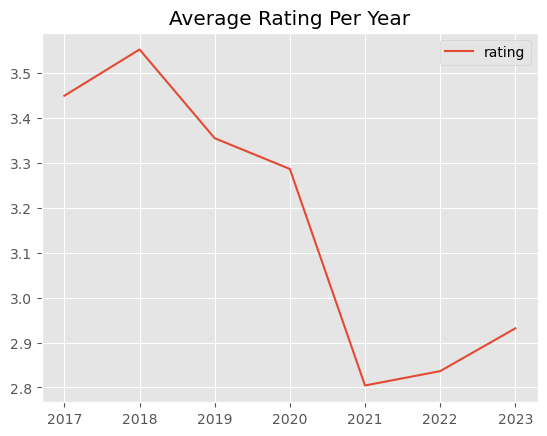

In [34]:
wm_year_average.plot(y = 'rating', use_index = True, xlabel = "", title = "Average Rating Per Year")
plt.show()

It is worth noting here, that I did not get all 240,000+ reviews from my webscraper. Like I said previously it would have a hiccup every now and again and I didnt build any exception handling. This most likely had an effect on the amount of reviews collected per year - and thus could also affect the overall averages. Just something to keep in mind. Overall, we see a hard rop in ratings in 2020 - most likely due to COVID. It also started to show an uptick in 2023 but overall did not improve much since 2021. 

### Comparing ratings, and counts of ratings

In [35]:
# normalizing the count and the rating, so we can compare on one graph

wm_year_average['count_norm'] = (wm_year_average['count'] - wm_year_average['count'].min()) / (wm_year_average['count'].max() - wm_year_average['count'].min())

In [36]:
wm_year_average['rating_norm'] = (wm_year_average['rating'] - wm_year_average['rating'].min()) / (wm_year_average['rating'].max() - wm_year_average['rating'].min())

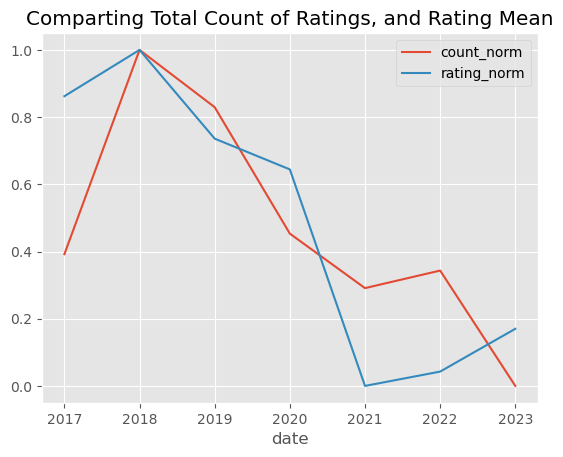

In [37]:
wm_year_average.plot( y = ['count_norm', 'rating_norm'], use_index = True, title = "Comparting Total Count of Ratings, and Rating Mean")
plt.show()

Rating and rating counts are decreasing. Overall overall 2018 was a great year im terms of reviews. 2018 had the most reviews of the years measured, and at the highest average rating. When COVID starts to hit in 2020, we can see both a decline in reviews, and a decline in ratings. Counts could be decreasing due to unemployment and ratings could be decreasing due to working conditions during the pandemic. We see an uptick in ratings in 2022 - COVID began to die down, more people were probably working. More reviews led to a slight uptick in rating as well. 

### Average sentiment scores - For reviews and the titles of the reviews

In [38]:
#getting the basic sentiment from titles and reviews

def sentiment_score(text):
    text = str(text)
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

wm['title_sentiment_score'] = wm['title'].apply(sentiment_score)
wm['review_sentiment_score'] = wm['review'].apply(sentiment_score)

In [39]:
wm

,title,review,rating,position,employment_status,location,date,title_sentiment_score,review_sentiment_score
0,great place to work,Indeed Featured reviewThe most useful review s...,4.0,"CUSTOMER SERVICE SUPERVISOR, OVER-NIGHT",Former Employee,"El Paso, TX 79904",2018-03-23,0.800000,0.400000
1,"Fun, Rewarding",If you like physical work you’ll do well and l...,3.0,Associate,Former Employee,"Houston, TX",2023-02-04,0.400000,0.045671
2,5 stars,What is the best part of working at the compan...,5.0,Office Manager,Former Employee,"Sonora, CA",2023-02-03,0.000000,0.500000
3,Ignorant Management,"Limited training, and pushed to work solo, whe...",2.0,Cashier,Former Employee,"Honesdale, PA",2023-02-03,0.000000,-0.182310
4,4 stars,What is the best part of working at the compan...,4.0,Walmart Stocker,Former Employee,"Pontotoc, MS",2023-02-03,0.000000,0.365972
...,...,...,...,...,...,...,...,...,...
139204,Great place,"I loved working for Walmart, brought me out of...",5.0,Cashier/Stocker,Former Employee,"Webb City, MO",2017-07-07,0.800000,0.046439
139205,hostile work environment,No job security. There is a lot of backstabbin...,1.0,Order Specialist,Former Employee,"Bentonville, AR",2017-07-07,0.000000,0.250000
139206,team players,i enjoyed the team player relationship we had ...,5.0,Cashier,Former Employee,"Anaheim, CA",2017-07-07,0.000000,0.215741
139207,Decent pay for job,For the most part they promote furthering your...,4.0,Meat Clerk,Current Employee,Iowa,2017-07-07,0.166667,0.002778


In [40]:
#getting average sentiment of reviews and titles

wm_average_sentiment = wm.groupby(wm['date'].dt.year).agg({'title_sentiment_score':'mean', 'review_sentiment_score':'mean'}).rename( columns = {'title_sentiment_score':"mean_title", "review_sentiment_score":'mean_review'})

In [41]:
wm_average_sentiment

,mean_title,mean_review
date,,
2017,0.205922,0.218259
2018,0.304215,0.243903
2019,0.189343,0.201799
2020,0.167829,0.198483
2021,0.093315,0.125558
2022,0.091821,0.138815
2023,0.107423,0.165423


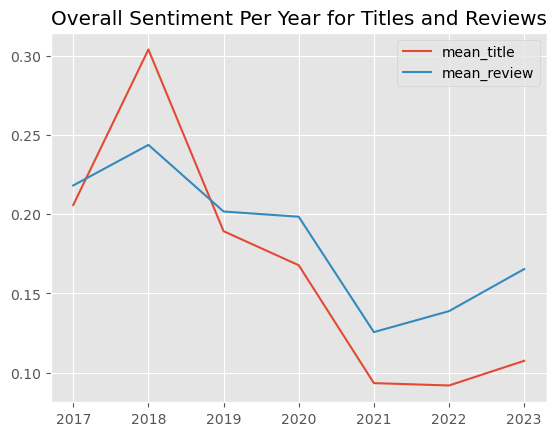

In [42]:
wm_average_sentiment.plot(title = 'Overall Sentiment Per Year for Titles and Reviews', xlabel = "")
plt.show()


Again, we see peaks in in 2018. 0.25 - 0.30 on the seniment scale is positive leaning, but not a strong positivity. We saw before that ratings crashed during the pandemic, but overall sentiment did not ever reach a negative. The lowest was only just above neutral (0).

### Scatter Matrix - showing relationships and distributions in data

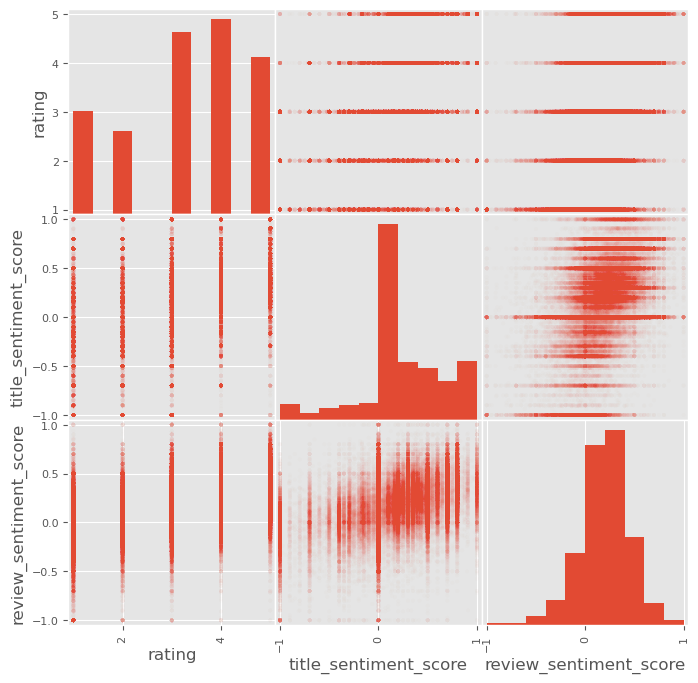

In [43]:
pd.plotting.scatter_matrix(wm, figsize = (8,8), alpha = .01)
plt.show()

I had just learned about the scatter matrix and wanted to give it a try on this data. My main takeaways:

> Generally ratings, reviews and titles are mostly positive in their distributions.

> As rating increases so does sentiment - showing a slight positive correlation - but these correlations have a very wide variance. This to me means a weak correlation. This is interesting since we do have ratings of 5 stars, with overtly negative reviews and titles

> **Overall weak positive correlations for rating and sentiment, although id expect it to be stronger**

### Average rating per year for both Current and Former employees

In [44]:
#how many positions are in the dataset

wm['position'].value_counts()

Cashier                                         11174
Sales Associate                                  6676
CUSTOMER SERVICE SUPERVISOR, OVER-NIGHT          6629
Cashier/Customer Service                         3850
Stocker                                          3849
                                                ...  
cashier, service desk, jewelry, grocery             1
Department Manager and front end Supervisor         1
Front end Assistant Manager                         1
FreshCap                                            1
3rd shift Cashier/ Stock                            1
Name: position, Length: 23071, dtype: int64

Value counts shows that the position listed needs some processing in order to do more analysis. Lets instead do a trend of former vs current employees

In [45]:
#aggregating some basic stats for employment status

wm_emp_stats = wm.groupby('employment_status').agg('mean')

In [46]:
wm_emp_stats

,rating,title_sentiment_score,review_sentiment_score
employment_status,,,
Current Employee,3.186611,0.164679,0.183172
Former Employee,3.345354,0.214726,0.207901


This is actually very interesting. I'd assume that former employees would be more likely to leave negative reviews - but there are clearly more positive that reviews left by current employees. 

In [47]:
#grouping by year and employment status - and getting a mean for their ratings

wm_emp = wm.groupby([wm['date'].dt.year,'employment_status']).agg({'rating':'mean'})

In [48]:
wm_emp = wm_emp.reset_index()

In [49]:
#creating dataframes for each employment status

current_emp_ratings = wm_emp[wm_emp['employment_status'] == 'Current Employee']
former_emp_ratings = wm_emp[wm_emp['employment_status'] == 'Former Employee']

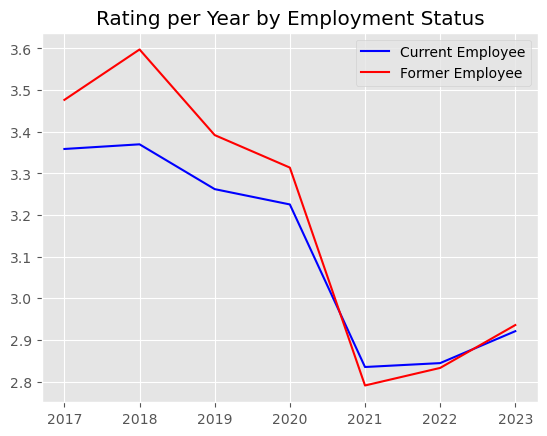

In [50]:
#plotting the dataframes

plt.plot(current_emp_ratings['date'],current_emp_ratings['rating'], label = 'Current Employee', color = 'blue')
plt.plot(former_emp_ratings['date'],former_emp_ratings['rating'], label = 'Former Employee', color = 'red')
plt.title("Rating per Year by Employment Status")
plt.legend()
plt.show()

Like I said before, id expect the opposite from what we see here. Although the gap is not huge and just looks pretty big due to representation, its still interesting. Former employees seemed to have a better overall experience than current. Im not sure why that would be. 

### Average sentiment for Titles and Reviews for both Current and Former Employees

In [51]:
#doing the same aggregation except for sentiment instead of rating

wm_emp_sent = wm.groupby([wm['date'].dt.year,'employment_status']).agg({'review_sentiment_score':'mean', 'title_sentiment_score':'mean'})

In [52]:
wm_emp_sent = wm_emp_sent.reset_index()

In [53]:
current_emp_title_sent = wm_emp_sent[wm_emp_sent['employment_status'] == 'Current Employee']
former_emp_title_sent = wm_emp_sent[wm_emp_sent['employment_status'] == 'Former Employee']

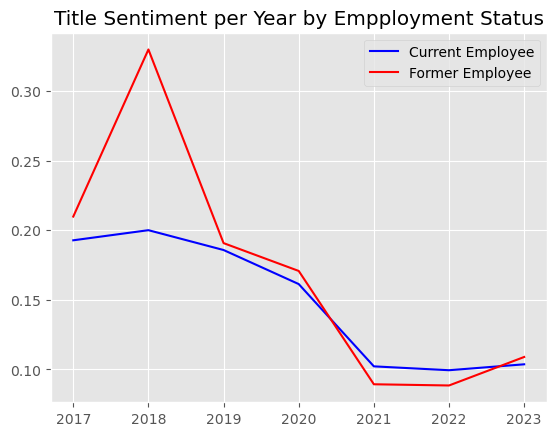

In [54]:
plt.plot(current_emp_title_sent['date'],current_emp_title_sent['title_sentiment_score'], label = 'Current Employee', color = 'blue')
plt.plot(former_emp_title_sent['date'],former_emp_title_sent['title_sentiment_score'], label = 'Former Employee', color = 'red')
plt.legend()
plt.title("Title Sentiment per Year by Empployment Status")
plt.show()

The sentiment of both former and current employees were largley inline with each other except for 2018 - where former employees had a much higher overall sentiment.

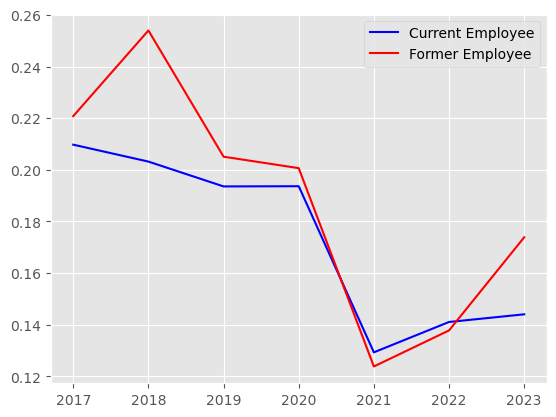

In [55]:
plt.plot(current_emp_title_sent['date'],current_emp_title_sent['review_sentiment_score'], label = 'Current Employee', color = 'blue')
plt.plot(former_emp_title_sent['date'],former_emp_title_sent['review_sentiment_score'], label = 'Former Employee', color = 'red')
plt.legend()
plt.show()

And the same trend happens with the sentiment of reviews. A notiable difference and peak in 2018 for former employees. We might be seeing the same trend in 2023, with a noticable uptick for former employees. 

# Conculsion

> **Average rating per year since 2017**
>> A peak in overall ratings in 2018, followed by a sharp decline during COVD years, but showing a slight increase in 2023 so far.

> **Comparing ratings, and counts of ratings**
>> Counts of ratings seem to follow ratings pretty closely, as rating decreased so did the total count of reviews. This could be due to a data collection error - So I dont want to speculate too much on the cause of this trend. If the data were 100% accurate it could be due to COVID and unemployment - less employees, less reviews and lower ratings. But maybe we would actually expect an uptick in former employee review counts. Maybe displaying counts per employment status would have helped give more insight to this trend. Ill expand on that in the next review of this data.

> **Average sentiment scores - For reviews and the titles of the reviews**
>>Peaks in 2018 and then COVID Crashes - but overall positive sentiments although weak. 

> **Scatter Matrix - showing relationships and distributions in data**
>> Helped furthur our understanding  of the strength of the relationships, and the distributions of sentiment and ratings. Overall ratings leaned towards positive - as well as sentiment. Sentiment showed a weak but positive correlation with rating.

>**Average rating per year for both Current and Former employees**
>> 2018 was a strange year showing much higher ratings for former employees than current. The representation of the data makes it seem much bigger of a gap then it really is, but it is noticable. Otherwise trends followed downwards in rating close together.

>**Average sentiment for Titles and Reviews for both Current and Former Employees**
>> Again the representation of data makes 2018 seem like a great year in terms of ratings, but the gap is not huge. After a peak in 2018 for Former employees, the data followed close together downwards in overall sentiment